In [1]:
import tuxml
import pandas as pd 

df = tuxml.load_dataset()

In [2]:
df.sort_values("vmlinux")[:5]

,X86_LOCAL_APIC,OPENVSWITCH,TEXTSEARCH_FSM,LOCKDEP_SUPPORT,GENERIC_CLOCKEVENTS_MIN_ADJUST,NETFILTER_XT_MATCH_TCPMSS,MPLS,NFC_HCI,STACKTRACE_SUPPORT,GENERIC_CMOS_UPDATE,...,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4,cid,nbyes,nbno,nbmodule,nbyesmodule
109097,1,0,0,1,1,0,0,0,1,1,...,2863640,644621,814544.0,2900824,669288,124978,241,12237,0,241
58621,1,0,0,1,1,0,0,0,1,1,...,2777624,558712,724432.0,2810712,578375,74458,240,12238,0,240
107213,1,0,0,1,1,0,0,0,1,1,...,3953176,1734208,1986512.0,4072280,1841339,123091,741,11068,669,1410
99232,1,0,0,1,1,0,0,0,1,1,...,4248440,2027905,2290640.0,4375728,2144007,115110,636,11131,711,1347
99777,1,0,0,1,1,0,0,0,1,1,...,4096536,1877790,2139088.0,4223832,1994471,115655,721,11351,406,1127


In [3]:
df_importance = pd.read_csv("feature_importanceRF.csv")
df_importance = df[df_importance[:100]["Unnamed: 0"].values]
df_importance.head()

,DEBUG_INFO,nbyes,DEBUG_INFO_SPLIT,RT2800USB_RT33XX,DEBUG_INFO_REDUCED,UBSAN_SANITIZE_ALL,X86_NEED_RELOCS,SCSI_MVSAS,RANDOMIZE_BASE,SECURITY_SELINUX_DEVELOP,...,CAN_SOFTING_CS,DRM_I915_USERPTR,ACPI_WMI,PLATFORM_SI4713,RTC_DRV_LP8788,CRYPTO_POLY1305,USB_ATM,DRM_I915_ALPHA_SUPPORT,MWIFIEX,CRYPTO_FIPS
14758,0,1435,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14759,0,1382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14760,0,1626,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14761,0,2140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14762,0,2651,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]
additional_ft = ["nbyes", "nbno", "nbmodule", "nbyesmodule"]

In [5]:
#learning a model by using linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

def run_regressorML(reg, test_size, size_target, x_train, x_test):
    assert(size_target in size_methods)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    #y_pred = reg.intercept_ + np.sum(reg.coef_ * x_test.values, axis=1)
    dfErrors = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, "error":(y_pred - y_test).abs(), "% error":((y_pred - y_test)/y_test).abs()*100})
    return dfErrors["% error"].describe()

In [6]:
def ft_importances(coef_, col):
    importanceSeries = pd.Series(coef_, index=col.values)
    return importanceSeries[importanceSeries != 0].abs().sort_values(ascending = False)

In [7]:
df_result  = pd.DataFrame(columns = ['algorithm_name', 'ft_dummyfication', 'origin_ft_selection', 'ft_selection', 'hyperparameters', 'size_target', 'additional_ft', 'test_size', 'coef_order', 'accuracy'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn import metrics

target = "vmlinux"
paramsLasso = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],
               'max_iter': [1, 5, 10, 100, 1000],}
paramsRidge = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
paramsENet = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],
              'l1_ratio': [0.0, 0.5, 1.0, 0.1],
              'max_iter': [1, 5, 10, 100, 1000],}

for ft_dummyfication in [False, True]:
    if ft_dummyfication:
        #Creating dummy variables in pandas
        df = pd.get_dummies(df, columns=list(df.drop(columns=["cid"]).drop(columns=size_methods).drop(columns=additional_ft).columns.values))
        df_importance = pd.get_dummies(df_importance, columns=list(df_importance.drop(columns=["nbyes", "nbno", "nbyesmodule"]).columns.values))
        
    ft_selection =  {'None': df.drop(columns=["cid"]).drop(columns=size_methods).columns,
                     'RandomForest': df_importance.columns[:100],}
        
    for origin_ft_selection in ft_selection:
        for size in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:

            x_train, x_test, y_train, y_test = train_test_split(df[ft_selection[origin_ft_selection]], df[target], test_size=size, random_state=42)  
            x_train, y_train = np.array(x_train.values), np.array(y_train.values)

            model = {'LinearRegression': LinearRegression(),
                     'Lasso': GridSearchCV(linear_model.Lasso(), param_grid=paramsLasso, cv=3).fit(x_train, y_train).best_estimator_,
                     'Ridge': GridSearchCV(linear_model.Ridge(), param_grid=paramsRidge, cv=3).fit(x_train, y_train).best_estimator_,
                     'ElasticNet': GridSearchCV(ElasticNet(), param_grid=paramsENet, scoring='r2', cv=3).fit(x_train, y_train).best_estimator_,
                     'PolynomialRegression': LinearRegression(),}
        
            for key in model:
                if (key == 'PolynomialRegression') and (origin_ft_selection == 'None'):
                    print("It doesn't scale")
                else:
                    if (key == 'PolynomialRegression'):
                        #for 2 options we have: 𝑓(𝑥₁, 𝑥₂) = 𝑏₀ + 𝑏₁𝑥₁ + 𝑏₂𝑥₂ + 𝑏₃𝑥₁² + 𝑏₄𝑥₁𝑥₂ + 𝑏₅𝑥₂²
                        x_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_train)
                        x_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_test)
                        
                    res_model = run_regressorML(model[key], test_size=size, size_target=target, x_train=x_train, x_test=x_test)
                    
                    if (key == 'PolynomialRegression'):
                        model[key].coef_ = model[key].coef_[:100]
                    
                    coef_order = ft_importances(model[key].coef_, col=ft_selection[origin_ft_selection])
                    df_result.loc[len(df_result)] = [key, ft_dummyfication, origin_ft_selection, ft_selection[origin_ft_selection], model[key], target, additional_ft, size, coef_order, res_model]

df_result.to_csv("results.csv", header=True)

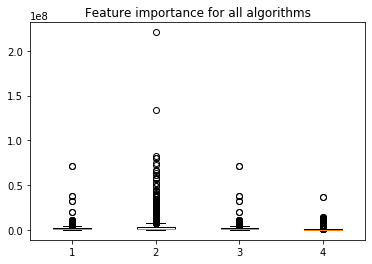

In [44]:
# Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [order_lr, order_lasso, order_ridge, order_en]
fig1, ax1 = plt.subplots()
ax1.set_title('Coeficient of feature importance for all algorithms')
ax1.boxplot(data)
plt.show()